<a href="https://colab.research.google.com/github/SardarAmmer/DataScience-Projects-/blob/main/DEN_Task_1(Heart_disease).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   NaN    1   3       145   233    1        0      150      0      2.3   
1  37.0    1   2       130   250    0        1      187      0      3.5   
2  41.0    0   1       130   204    0        0      172      0      1.4   
3  56.0    1   1       120   236    0        1      178      0      0.8   
4  57.0    0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


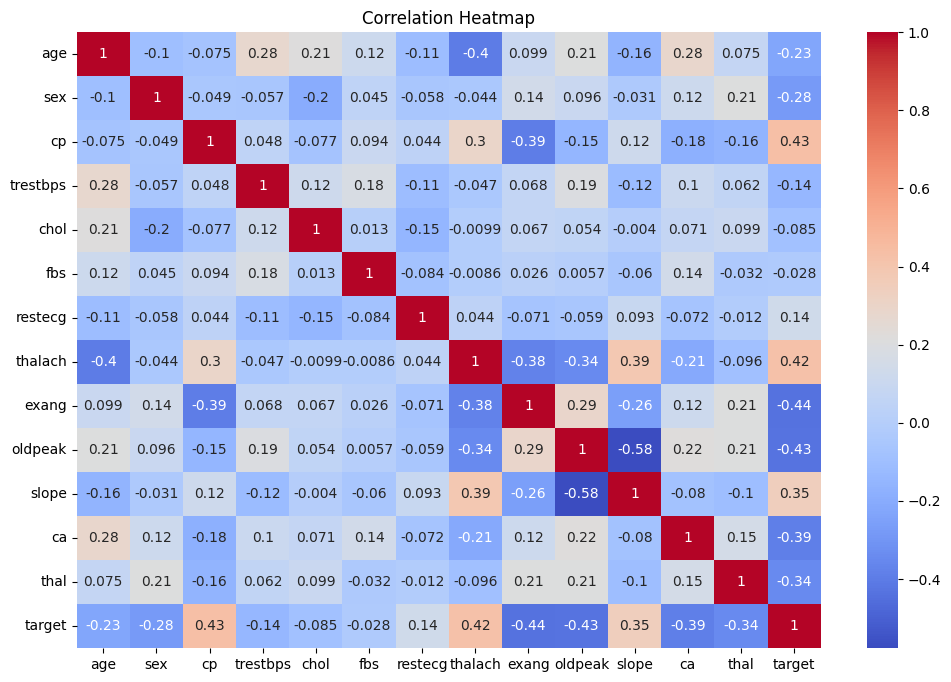


=== Logistic Regression ===
Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168316

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



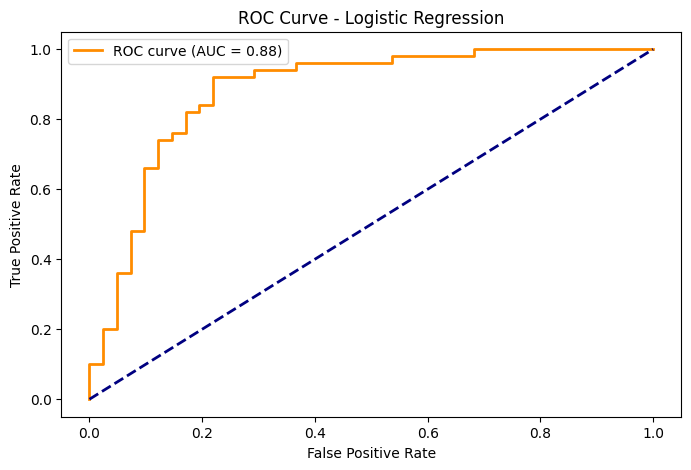

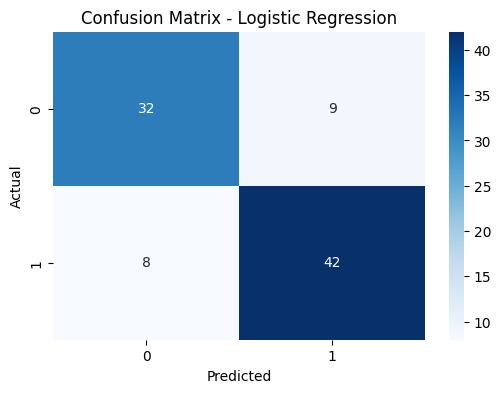


=== Decision Tree ===
Accuracy: 0.7472527472527473
Precision: 0.7872340425531915
Recall: 0.74
F1 Score: 0.7628865979381443

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        41
           1       0.79      0.74      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



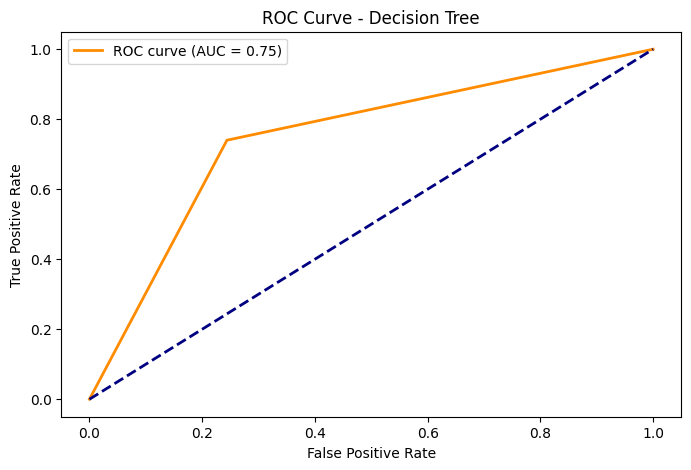

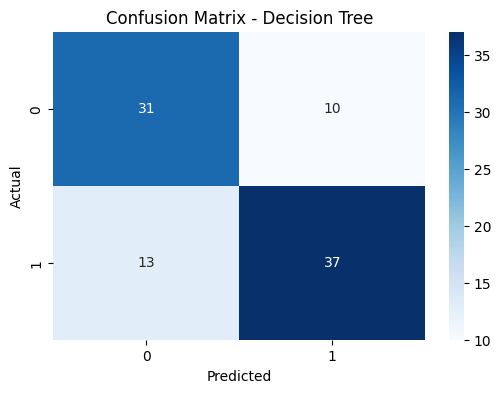


=== Random Forest ===
Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



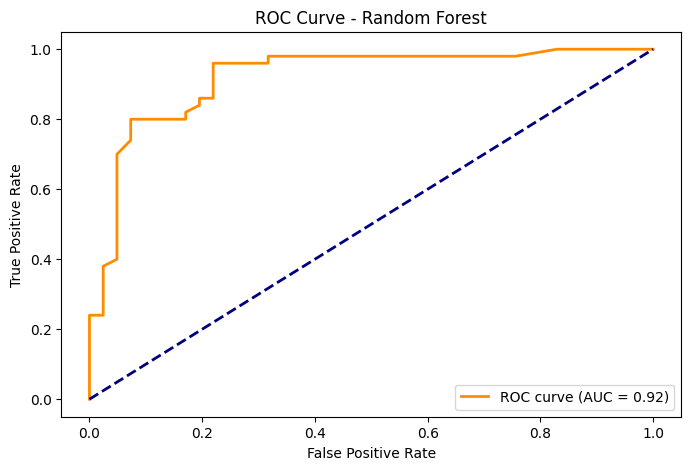

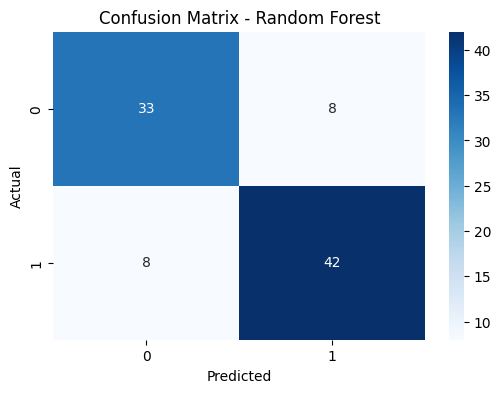


=== HistGradientBoosting ===
Accuracy: 0.8131868131868132
Precision: 0.8666666666666667
Recall: 0.78
F1 Score: 0.8210526315789474

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



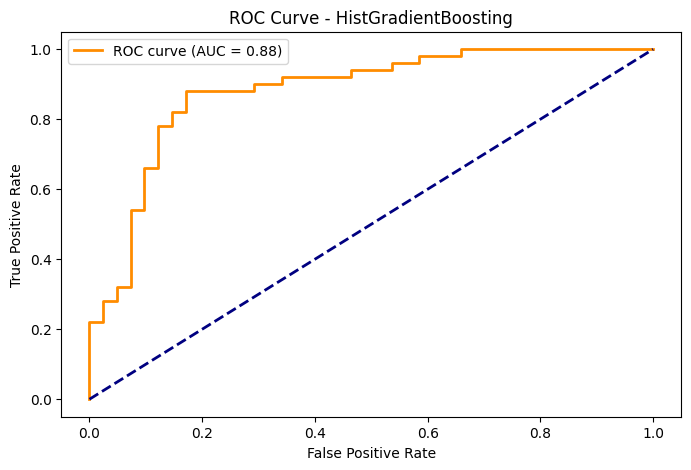

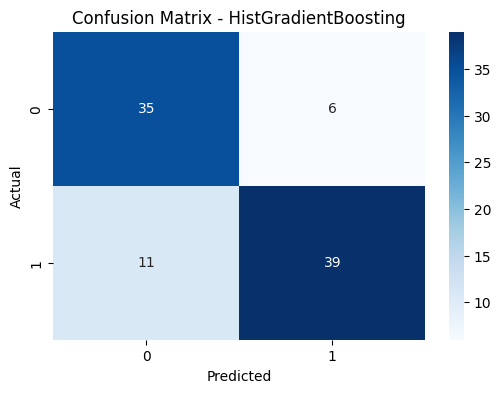


Best RF Params: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Tuned Random Forest Accuracy: 0.8461538461538461


In [ ]:
# @title DEN TASK 1 (Heart Disease Prediction )
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Load data
df = pd.read_csv('/content/heart.csv')
print(df.head())

# Columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['target']]

# Label encode if needed
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# EDA - correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Features & target
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

# Train & Evaluate
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Basic metrics
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:,1]
    else:
        y_prob = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# OPTIONAL: GridSearchCV for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

grid_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(grid_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nBest RF Params:", grid_search.best_params_)
y_pred_rf_best = grid_search.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))


In [ ]:
# @title Task Explanation

""" Heart Disease Prediction - Explanation
In this assignment, I worked on developing a machine learning model for predicting heart disease using a real-world medical dataset that contains patient health and demographic attributes.

Key steps I followed:

1️⃣ Data Cleaning & Preprocessing

I checked for missing values in the dataset.

Instead of just dropping or filling missing values with the mean, I used a KNN Imputer, which fills missing numeric values based on the nearest neighbors,which gives better results than simple mean imputation.
I used Label Encoding to convert categorical features to numeric format so they can be used in the models.

2️⃣ Feature Scaling & Pipeline

I scaled the numerical features using StandardScaler to make sure that all input features are on the same scale, which improves model training.

I combined the imputation, scaling, and model training steps into a scikit-learn Pipeline, which keeps the workflow clean and avoids data leakage.

3️⃣ Exploratory Data Analysis (EDA)

I created a correlation heatmap to visualize how different features are correlated with each other and with the target variable.

I customized the heatmap size for better readability when explaining the results.

4️⃣ Model Training & Evaluation

I trained four different models: Logistic Regression, Decision Tree, Random Forest, and HistGradientBoostingClassifier.

For each model, I calculated and printed accuracy, precision, recall, and F1 score.

5️⃣ Extra step - Confusion Matrices & ROC Curves for each model

As an extra step to make the results clearer, I plotted a separate ROC curve for each model to visually compare their performance.

I also created separate confusion matrix heatmaps for each model to show how well each model predicts positive and negative cases. This makes it easier to explain model strengths and weaknesses.

6️⃣ Hyperparameter Tuning

I also included an example of hyperparameter tuning using GridSearchCV for Random Forest to find better parameters and improve the model’s accuracy. """




